### Create bboxs

From data analysis of dataset we concluded that:
* Classes 1, 2, 3, 4, 5, 11, 13 we should mark manually
* For classes 6, 7, 8, 9, 10, 12 we may create bboxes automatically (by formula). Here we create such bboxes

In [6]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFont


In [82]:
root = Path('/home/ezhur/datasets/projects/hakaton_pipes/dataset_namings/imgs')
df_path = './df_pipe_paths.csv'

IMG_HEIGHT = 600
IMG_WIDTH = 960

In [81]:
# read df
df = pd.read_csv(df_path, index_col=0)
df

,path,x,y,class,new_path,type_defect,importance_defect,name_defect
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg,1.0,1.0,crack_1
1,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg,1.0,1.0,crack_1
2,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg,1.0,1.0,crack_1
3,0/1538/frame0009.bmp,576.0,313.0,3.0,3.jpg,1.0,1.0,crack_1
4,0/1538/frame0009.bmp,724.0,509.0,3.0,3.jpg,1.0,1.0,crack_1
...,...,...,...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg,NaN,NaN,NaN
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg,NaN,NaN,NaN
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg,NaN,NaN,NaN
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg,NaN,NaN,NaN


In [59]:
# sizes of bboxes per class
bbox_size_dict = {6: [80, 80], 7: [80, 80], 8: [60, 60], 9:[60, 60], 10: [180, 180], 12: [180, 60]}
cls_add_bb = list(bbox_size_dict.keys())

#### 1. Visualization

In [75]:
def get_img_with_bbox(df, img_name, img):
    """Adds bbox to img for defects of classes 6, 7, 8, 9, 10, 12"""
    # paste img on a white background
    bgd_img = Image.new('RGB', (IMG_WIDTH+100, IMG_HEIGHT+100), (255, 255, 255))
    bgd_img.paste(img, (0, 0)) 

    # find bboxes corresponding to given image
    df_slice = df[df['new_path'] == img_name]

    draw = ImageDraw.Draw(bgd_img)

    # draw marks on image
    # font = ImageFont.truetype("arial.ttf", 16
    font = ImageFont.truetype("Ubuntu-R.ttf", 30)
    for index, row in df_slice.iterrows():
        x = row['x']
        y = row['y']
        cl = row['class']
        if np.isnan(x):
            continue
        cl = int(cl)
        if cl == 0: # no defect
            draw.ellipse((x-20, y-20, x+20, y+20), outline ='white')
        else:
            if cl in cls_add_bb:
                w, h = bbox_size_dict[cl]
                draw.rectangle((x-w//2, y-h//2, x+w//2, y+h//2), outline ='red')
                draw.text((x, IMG_HEIGHT+10), str(int(cl)), fill="red", font=font) 
                draw.text((IMG_WIDTH+10, y), str(int(cl)), fill="red", font=font) 
            else:
                draw.ellipse((x-20, y-20, x+20, y+20), outline ='blue')
                draw.text((x, IMG_HEIGHT+10), str(int(cl)), fill="blue", font=font) 
                draw.text((IMG_WIDTH+10, y), str(int(cl)), fill="blue", font=font) 
    return bgd_img


def plot_class_samples(df, class_num, sample_size=40):
    """Plot random sample of images with given defect type"""
    img_pathes = df[df['class'] == class_num]['new_path'].drop_duplicates().values
    # img_pathes = [p[:-4]+'_marked.jpg' for p in img_pathes]
    img_pathes = list(img_pathes)
    img_pathes_sample = random.sample(img_pathes, sample_size)

    for p in img_pathes_sample:
        path = root / p
        img = Image.open(path)
        
        bgd_img = get_img_with_bbox(df, p, img)
        plt.imshow(bgd_img)
        plt.show()

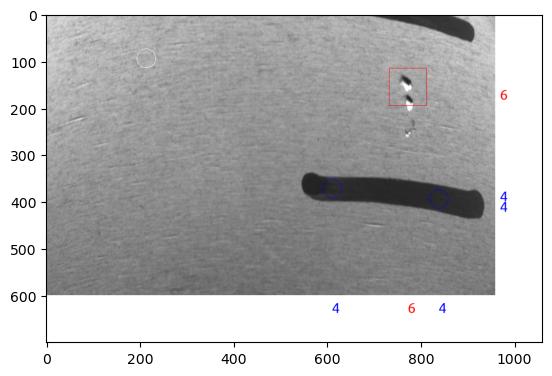

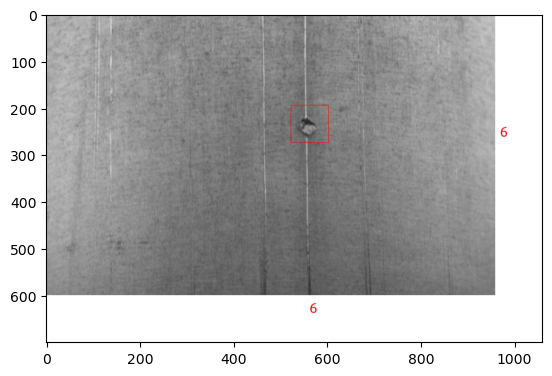

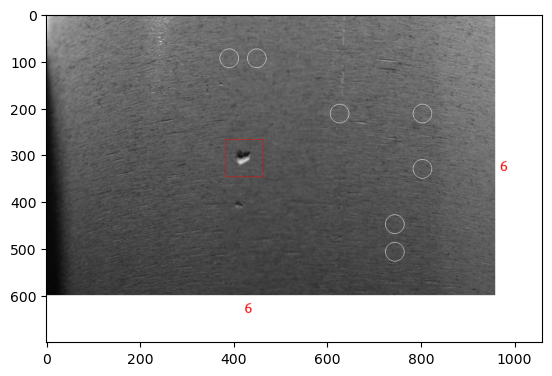

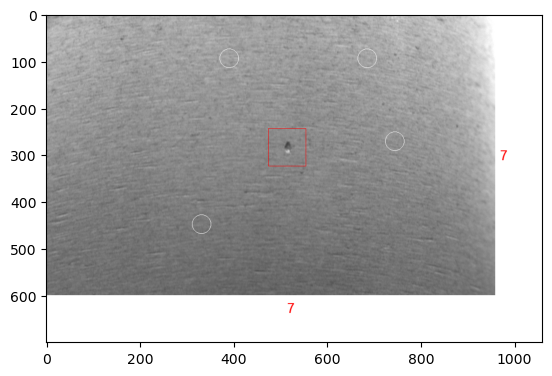

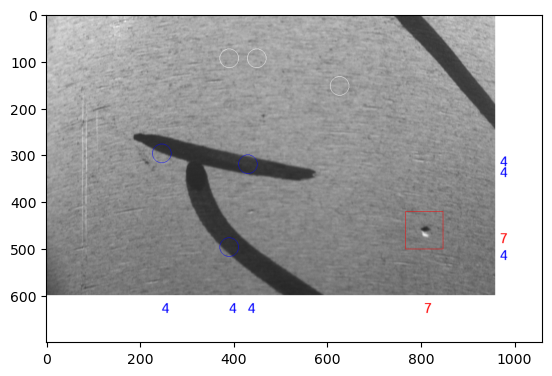

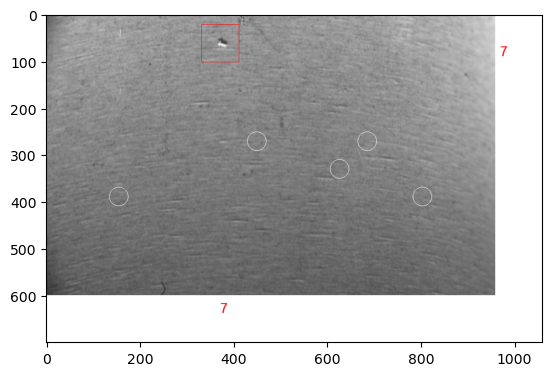

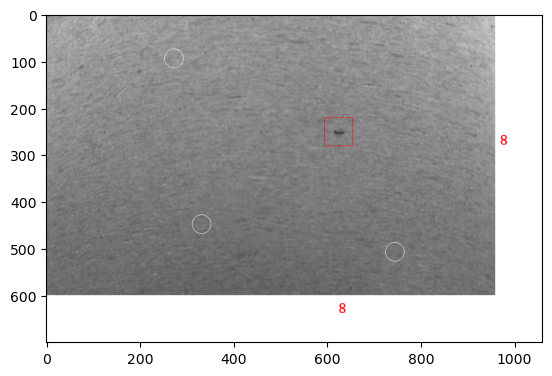

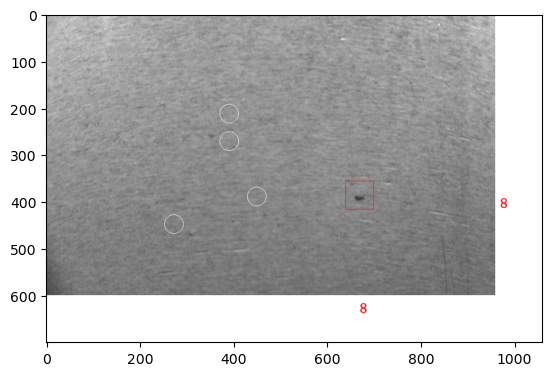

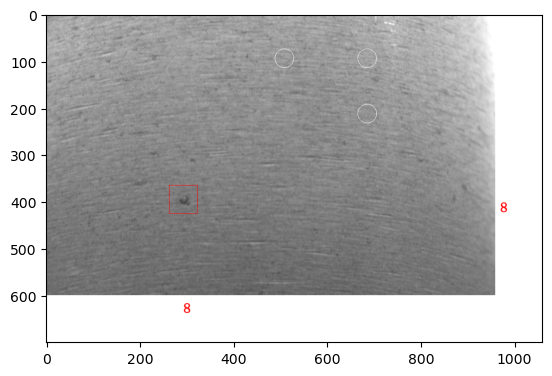

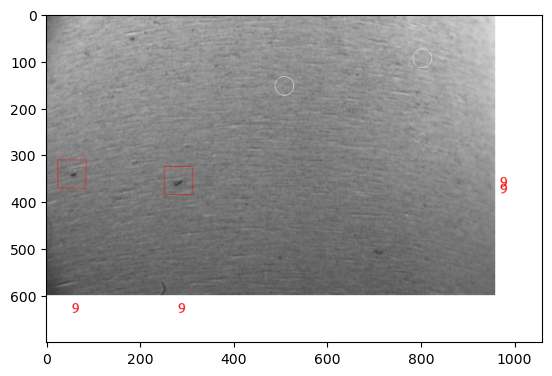

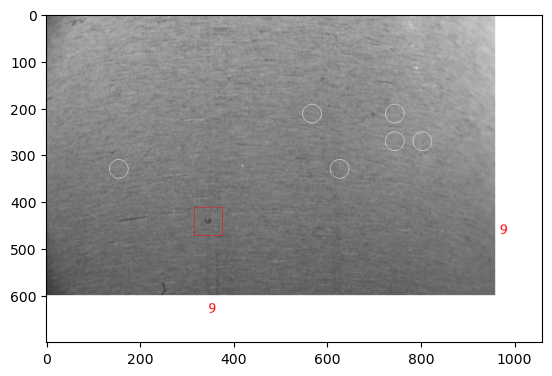

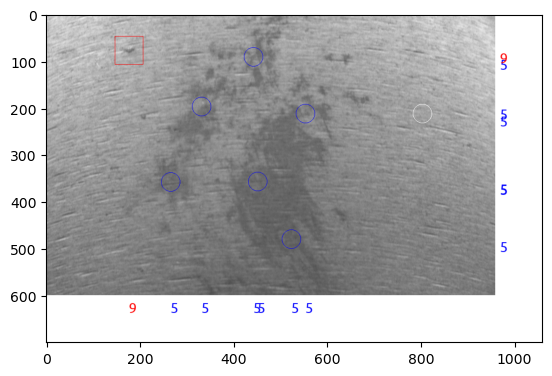

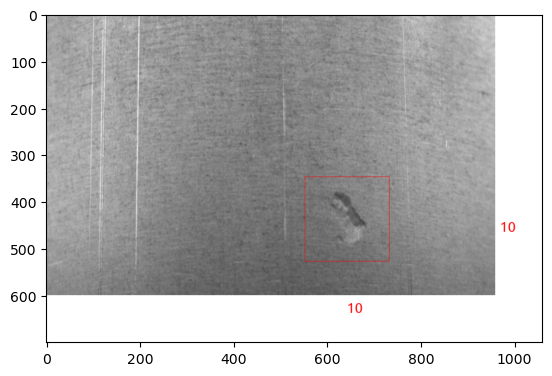

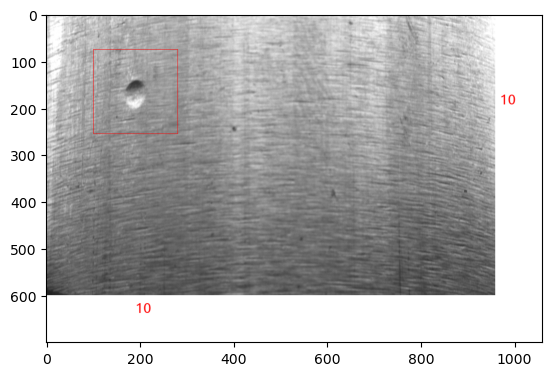

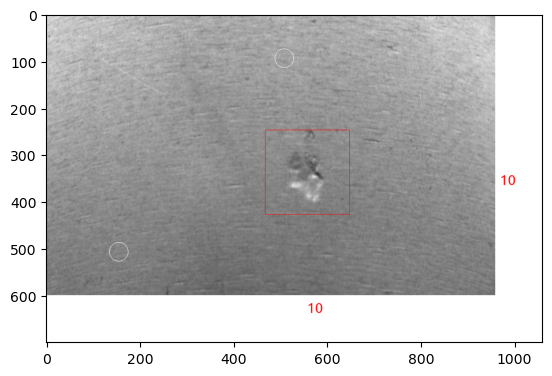

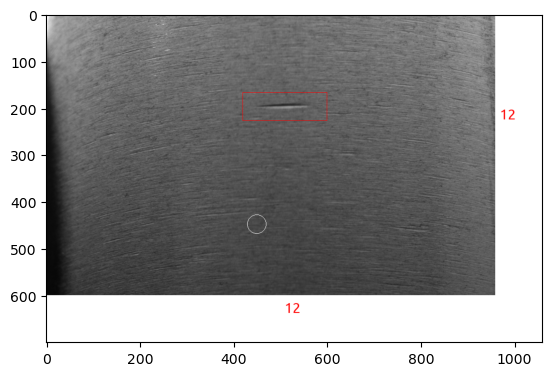

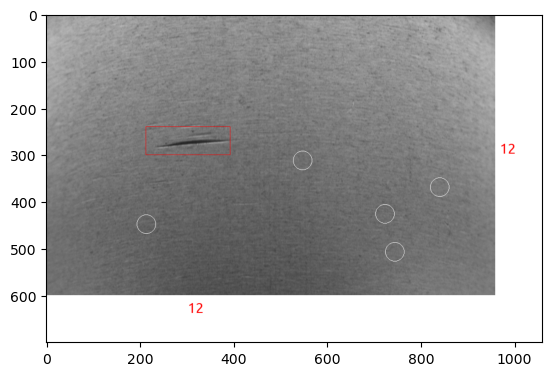

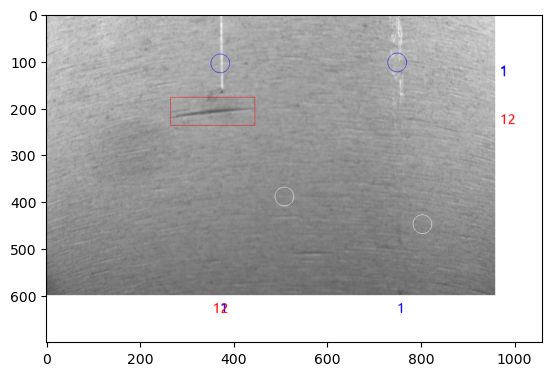

In [78]:
plot_class_samples(df, class_num=6, sample_size=3)
plot_class_samples(df, class_num=7, sample_size=3)
plot_class_samples(df, class_num=8, sample_size=3)
plot_class_samples(df, class_num=9, sample_size=3)
plot_class_samples(df, class_num=10, sample_size=3)
plot_class_samples(df, class_num=12, sample_size=3)

#### 2. Add bboxes to dataframe

In [79]:
df

,path,x,y,class,new_path,type_defect,importance_defect,name_defect
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg,1.0,1.0,crack_1
1,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg,1.0,1.0,crack_1
2,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg,1.0,1.0,crack_1
3,0/1538/frame0009.bmp,576.0,313.0,3.0,3.jpg,1.0,1.0,crack_1
4,0/1538/frame0009.bmp,724.0,509.0,3.0,3.jpg,1.0,1.0,crack_1
...,...,...,...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg,NaN,NaN,NaN
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg,NaN,NaN,NaN
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg,NaN,NaN,NaN
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg,NaN,NaN,NaN


In [132]:
def get_bbox(x_center, y_center, cls):
    if np.isnan(cls):
        return np.nan, np.nan, np.nan, np.nan
    cls = int(cls)
    
    # class of defect for which we cant automatically calculate bbox 
    if cls not in cls_add_bb:
        return np.nan, np.nan, np.nan, np.nan
    
    w, h = bbox_size_dict[cls]
    x_min = x_center - w//2 
    x_min = max(0, x_min)

    y_min = y_center - h//2
    y_min = max(0, y_min)

    x_max = x_center + w//2
    x_max = min(IMG_WIDTH, x_max)

    y_max = y_center + h//2
    y_max = min(IMG_HEIGHT, y_max)
    
    return x_min, y_min, x_max, y_max

In [134]:
# calculate bboxes
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = \
    zip(*df[['x', 'y', 'class']].apply(lambda elem: get_bbox(elem['x'], elem['y'], elem['class']), axis=1))

In [135]:
df[df['class'] == 9]

,path,x,y,class,new_path,type_defect,importance_defect,name_defect,x_min,y_min,x_max,y_max
31162,2020.10.15/труба 8/0_417.bmp,201.0,200.0,9.0,182.jpg,0.0,1.0,ledge_2,171.0,170.0,231.0,230.0
31163,2020.10.15/труба 8/5_417.bmp,840.0,218.0,9.0,183.jpg,0.0,1.0,ledge_2,810.0,188.0,870.0,248.0
31164,2020.10.16/Труба 4/1_287.bmp,597.0,273.0,9.0,193.jpg,0.0,1.0,ledge_2,567.0,243.0,627.0,303.0
31165,2020.10.17/Труба 5/3_755.bmp,360.0,363.0,9.0,248.jpg,0.0,1.0,ledge_2,330.0,333.0,390.0,393.0
31166,2020.10.21/2_442.bmp,435.0,52.0,9.0,283.jpg,0.0,1.0,ledge_2,405.0,22.0,465.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32076,2023.10.25/3_720.bmp,577.0,488.0,9.0,7650.jpg,0.0,1.0,ledge_2,547.0,458.0,607.0,518.0
32077,2023.10.25/4_530.bmp,354.0,505.0,9.0,7681.jpg,0.0,1.0,ledge_2,324.0,475.0,384.0,535.0
32078,2023.10.25/4_754.bmp,587.0,174.0,9.0,7689.jpg,0.0,1.0,ledge_2,557.0,144.0,617.0,204.0
32079,2023.10.25/5_140.bmp,316.0,132.0,9.0,7700.jpg,0.0,1.0,ledge_2,286.0,102.0,346.0,162.0


In [149]:
df[~df['x_min'].isna()] # 2k

,path,x,y,class,new_path,type_defect,importance_defect,name_defect,x_min,y_min,x_max,y_max
30857,0/d/0.bmp,673.0,329.0,6.0,45.jpg,3.0,1.0,crack_2,633.0,289.0,713.0,369.0
30858,0/d/4.bmp,501.0,468.0,6.0,46.jpg,3.0,1.0,crack_2,461.0,428.0,541.0,508.0
30859,0/d/5.bmp,362.0,465.0,6.0,47.jpg,3.0,1.0,crack_2,322.0,425.0,402.0,505.0
30860,0/nn/0.bmp,749.0,327.0,6.0,84.jpg,3.0,1.0,crack_2,709.0,287.0,789.0,367.0
30861,0/nn/03.bmp,839.0,493.0,6.0,85.jpg,3.0,1.0,crack_2,799.0,453.0,879.0,533.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33572,2023.10.10 804-23-04_1/1_494.bmp,186.0,334.0,7.0,7375.jpg,0.0,1.0,crack_3,146.0,294.0,226.0,374.0
33573,2023.10.10 804-23-04_1/1_832.bmp,767.0,332.0,7.0,7383.jpg,0.0,1.0,crack_3,727.0,292.0,807.0,372.0
33574,2023.10.10 804-23-04_1/4_544.bmp,372.0,62.0,7.0,7468.jpg,0.0,1.0,crack_3,332.0,22.0,412.0,102.0
33575,2023.10.10 804-23-04_1/4_733.bmp,534.0,502.0,7.0,7478.jpg,0.0,1.0,crack_3,494.0,462.0,574.0,542.0


In [150]:
df[df['class']!=0] # 10k

,path,x,y,class,new_path,type_defect,importance_defect,name_defect,x_min,y_min,x_max,y_max
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg,1.0,1.0,crack_1,NaN,NaN,NaN,NaN
1,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg,1.0,1.0,crack_1,NaN,NaN,NaN,NaN
2,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg,1.0,1.0,crack_1,NaN,NaN,NaN,NaN
3,0/1538/frame0009.bmp,576.0,313.0,3.0,3.jpg,1.0,1.0,crack_1,NaN,NaN,NaN,NaN
4,0/1538/frame0009.bmp,724.0,509.0,3.0,3.jpg,1.0,1.0,crack_1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df.to_csv('./df_bboxes.csv', index=0)

#### 3. Conclusions

We have 34k rows in dataset, 7808 imgs total. Among them 10k imgs correspond to real defect. 2k bboxes of defects we automatically calculated